**Error]** **<span style="color:Orange">에러명</span>**: 사유

# 폐렴 진단기 성능개선
-----
### 프로젝트 - 폐렴 진단기 성능개선

현재 가장 핫한 분야는 질병을 탐지해내는 인공지능 입니다.<br>이제 우리는 의사처럼 질병을 찾아내는 딥러닝 모델을 만들어보려고 합니다.<br>

**우리가 할 것은 폐렴(Pneumonia)을 찾아내는 딥러닝 모델을 만드는 것입니다.**<br>폐럼에 대해서 전혀 모르신다구요?<br>아래에 쉽게 이해할 수 있도록 설명 해놓았으니 너무 걱정마세요~<br>그 전에 의료영상 분석에 대해 먼저 알아볼까요?

## 의료영상 분석의 독특한 특징

>* 의료영상 이미지는 **개인정보 보호 등**의 이슈로 인해 데이터를 구하는 것이 어려움
>* 특히 희소병을 다루는 경우에는 데이터를 입수하는 것 자체가 드문 일
>* 라벨링 작업 자체가 전문적 지식을 요구하므로 date set 구축 비용이 상승
>* 음성/양성 데이터 간 imbalance가 심하기 때문에 학습에 주의가 필요
>* 이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할 수도 있음

최근의 발달한 딥러닝 기술은 숙련자 수준 이상의 정확도를 바탕으로 **영상분석 인력의 개인적 편차, 주관적 판단, 피로에 의한 오진 등의 부정확성을 극복**할 수 있는 좋은 대안으로 인정받고 있어요.<br>의료영상 처리를 위해서는 딥러닝 영상처리 기술뿐만 아니라, 의료 도메인 지식 및 의료영상에 대한 명확한 이해가 아울러 필요합니다.

### 의료 영상 처리의 핵심 영역들
---
의료 영상 처리는 각 과정마다 다양한 개념과 기법들이 사용됩니다.<br>이런 과정은 크게 세 단계로 구분할 수 있는데요, 이미지 생성, 이미지 컴퓨팅, 이미지 관리로 나눌 수 있습니다.
![](https://cdn.epnc.co.kr/news/photo/201907/91092_81350_2153.jpg)
---
영상 방식에 관계없이, 데이터 수집 프로세스는 물리적 인자들을 검출하고 수집한 신호를 전처리한 후 디지털화하는 과정을 거칩니다.<br>아래 그림은 대부분의 주요 의료 영상 방식에 적용되는 과정을 보여줍니다.
![](https://cdn.epnc.co.kr/news/photo/201907/91092_81351_2316.jpg)
---
![](https://cdn.epnc.co.kr/news/photo/201907/91092_81352_2514.jpg)
위의 표는 이미지 컴퓨팅과 이미지 관리 단계의 과제와 개발 동향을 요약한 것입니다.<br>

출처 : 테크월드뉴스(http://www.epnc.co.kr)

## 순서
> **Step1.** 실험환경 Set-up<br>
**Step2.** 데이터 준비하기<br>
**Step3.** 데이터 시각화<br>
**Step4.** CNN 모델링<br>
**Step5.** 데이터 imbalance 처리<br>
**Step6.** 모델 훈련<br>
**Step7.** 결과 확인과 시각화

**✓ 폐렴 구별법**

![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/12_e0QcAmT.png)

폐렴의 구별법은 언뜻 예상 외로 간단합니다.<br>X-RAY 사진상, 다양한 양상의 음영(폐 부위에 희미한 그림자) 증가가 관찰됩니다.<br>**정상적인 흉부 X-RAY(왼쪽)**는 이미지에서 비정상적인 음영 영역이 없는 깨끗한 폐를 보여줍니다. 세균성 폐렴 (가운데)은 일반적으로 오른쪽 상부 엽 (흰색 화살표)에 있는 나타내는 반면, 바이러스성 폐렴 (오른쪽)은 양쪽 폐에서보다 확산 된 "interstitial(조직 사이에 있는)" 패턴으로 나타납니다.

### Step1. 실험환경 Set-up
---
**✓ 가장 먼저, 사용할 패키지(라이브러리)들을 import**

In [1]:
import re    # 정규표현식 관련된 작업에 필요한 패키지
import os    # I/O 관련된 작업에 필요한 패키지 
import pandas as pd     # 데이터 전처리 관련된 작업에 필요한 패키지
import numpy as np      # 데이터 array 작업에 필요한 패키지
import tensorflow as tf  # 딥러닝 관련된 작업에 필요한 패키지
import matplotlib  # 데이터 시각화
import matplotlib.pyplot as plt    # 데이터 시각화에 관련된 작업에 필요한 패키지
from sklearn.model_selection import train_test_split  # 데이터 전처리에 필요한 패키지
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수값 표시
%matplotlib inline

Duplicate key in file PosixPath('/home/aiffel-dj49/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family: NanumGothic')


**✓ 앞으로 필요한 변수들을 생성**

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')  # 데이터 ROOT 경로 변수
BATCH_SIZE = 16  # # BATCH_SIZE 변수
IMAGE_SIZE = [180, 180]  # X-RAY 이미지 사이즈 변수
EPOCHS = 25  # # EPOCH 크기 변수

print(ROOT_PATH)

/home/aiffel-dj49/aiffel


### Step2. 데이터 준비하기
---
오늘 사용할 데이터는 모두 관상면 이미지로 되어 있습니다.<br>

**✓ 데이터 가져오기**

사용할 데이터는 **캐글의 Chest X-Ray Images** 입니다.<br>
폴더를 생성하고 캐글에서 데이터를 다운받아주세요.
> [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

해당 이미지는 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5 세 소아 환자의 흉부 X 선 영상입니다. 

**TIPS]** 캐글에서 다운로드한 데이터는 <span style="color:red">chest_xray 하위에 chest_xray 폴더가 중복으로 포함</span>되어 있어서 전체 데이터의 크기가 2.5GB인 경우가 있습니다.<br>**<span style="color:red">중복된 데이터는 필요하지 않으므로 제거해주세요!</span>**

> $ mkdir -p ~/aiffel/chest_xray

> $ cd ~/Downloads && unzip archive.zip -d ~/aiffel

위와 같이 압축을 풀고 나면, 데이터의 구성은 ~/aiffel/chest_xray 하위에 3개의 폴더 (train, test, val)로 구성되며, 각 이미지 카테고리 (폐렴 / 정상)에 대한 하위 폴더를 포함합니다.<br>5,856 개의 X-Ray 이미지 (JPEG)와 2 개의 범주 (폐렴 / 정상)가 있습니다.<br>**전체 데이터의 크기는 총 1.2GB 가량 됩니다.**

train : 5216 개
test : 624 개
val : 16 개
total : 5856 개


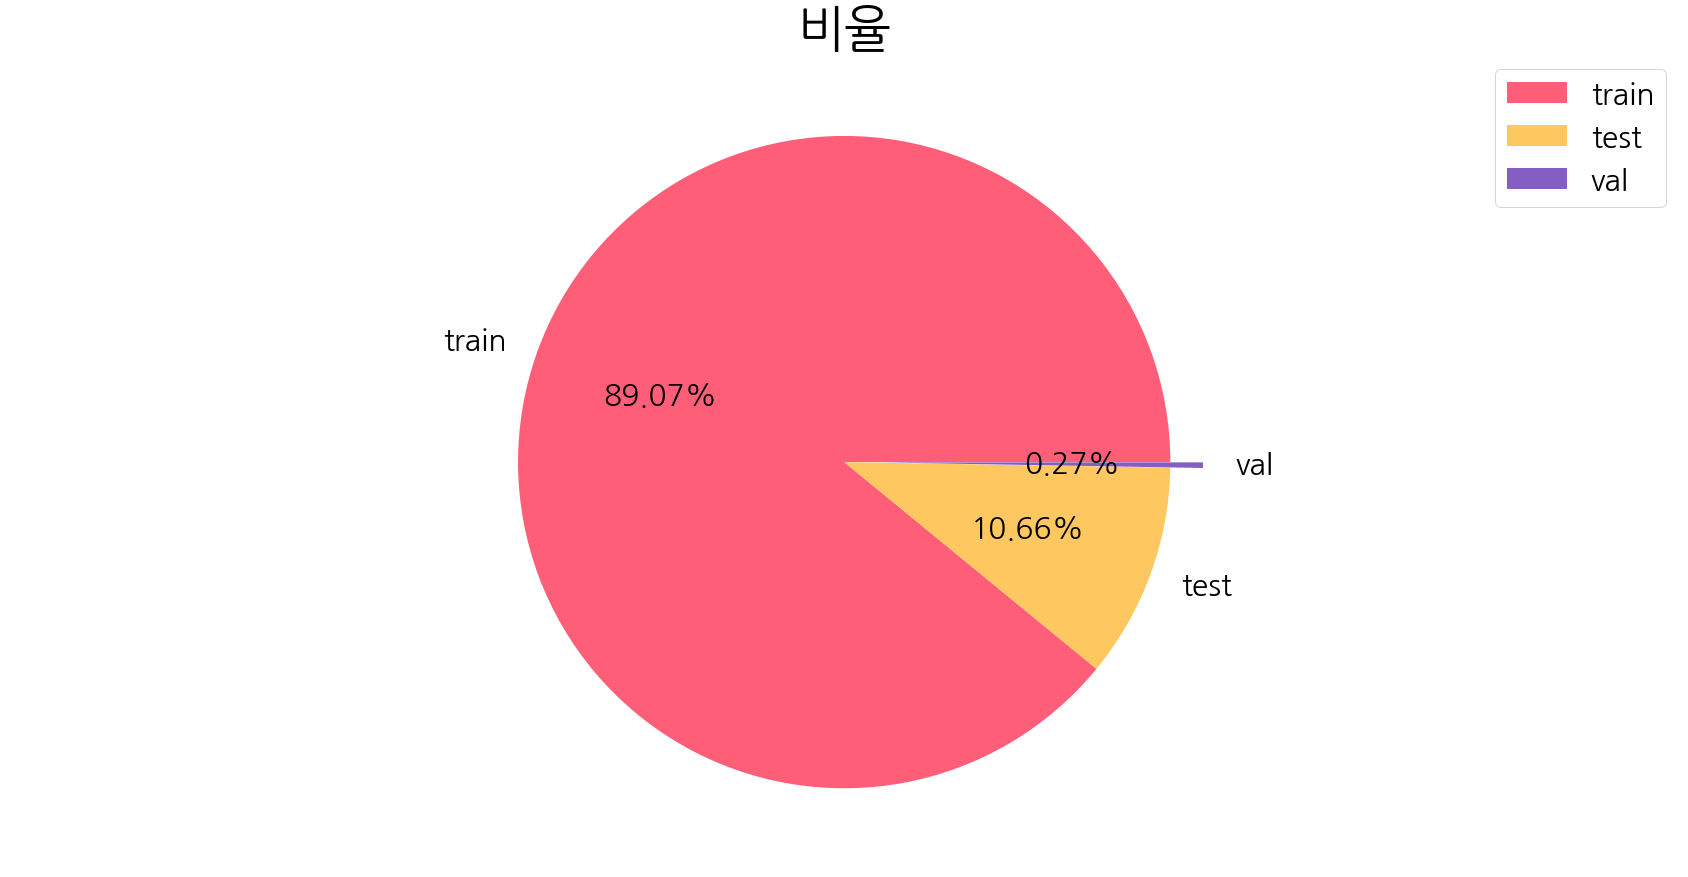

In [36]:
train_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/train/*/*'))
test_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/test/*/*'))
val_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/val/*/*'))

# 데이터를 열어보면 이미 train, val(validation), test 로 나뉘어져 있음
print('train :', len(train_filenames), '개')
print('test :', len(test_filenames), '개')
print('val :', len(val_filenames), '개')
print('total :', len(train_filenames+test_filenames+val_filenames), '개')

size = [len(train_filenames), len(test_filenames), len(val_filenames)]  # 데이터
label = ['train','test','val']  # 레이블
color = ['#ff5e78', '#ffc75f', '#845ec2']  # 색깔
plt.rc('font', size=30)
plt.figure(figsize=(30, 15))
plt.axis('equal')
plt.pie(size, labels=label, autopct='%.2f%%', colors=color, explode=(0,0,0.1))
plt.legend()
plt.title("비율", fontsize=50)
plt.show()

val 갯수가 너무 없기 때문에 train에서 val에 쓰일 데이터를 더 가져와보겠습니다.<br>
train과 val에 있는 데이터를 모은 다음에 train : val를 80:20으로 분할하겠습니다.

재분할된 train : 4185 개
재분할된 val : 1047 개


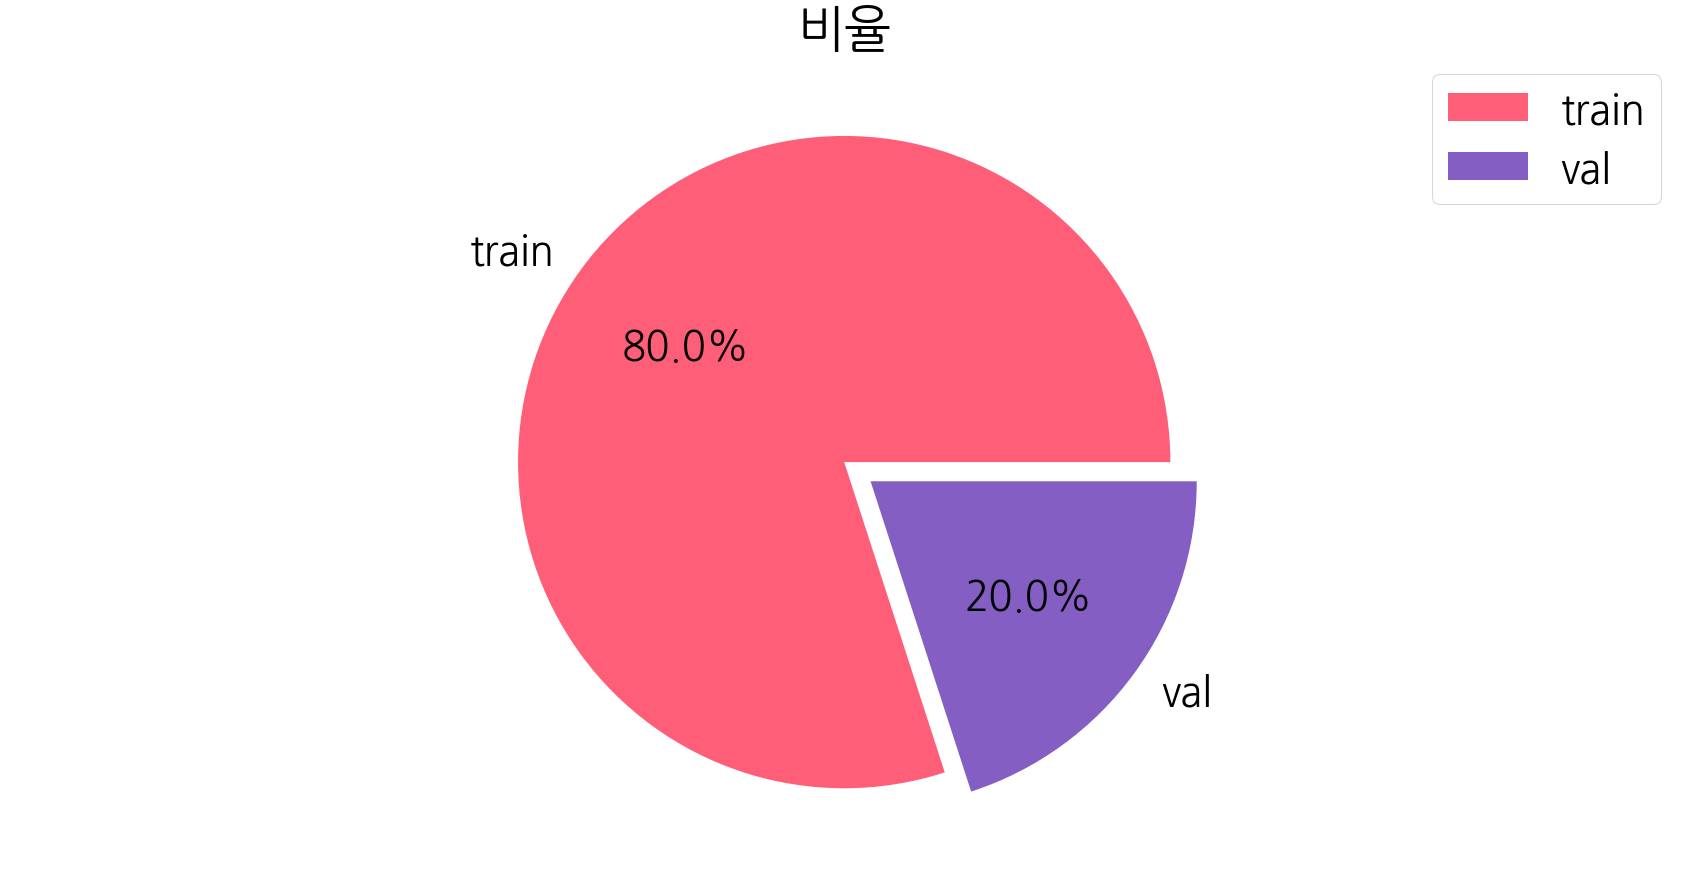

In [34]:
filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/train/*/*'))
filenames.extend(tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/val/*/*')))

# train, test(val) data set으로 분할. test_size에 0.2는 20%를 의미함.
train_filenames, val_filenames = train_test_split(filenames, test_size=0.2)

print('재분할된 train :', len(train_filenames), '개')
print('재분할된 val :', len(val_filenames), '개')

size = [len(train_filenames), len(val_filenames)]  # 데이터
label = ['train','val']  # 레이블
color = ['#ff5e78','#845ec2']  # 색깔
plt.figure(figsize=(30, 15))
plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f%%', colors=color, explode=(0,0.1))
plt.legend()
plt.title("비율", fontsize=50)
plt.show()

Normal images count in training set(정상 이미지 수): 1057 개
Pneumonia images count in training set(폐렴 이미지 수): 3128 개


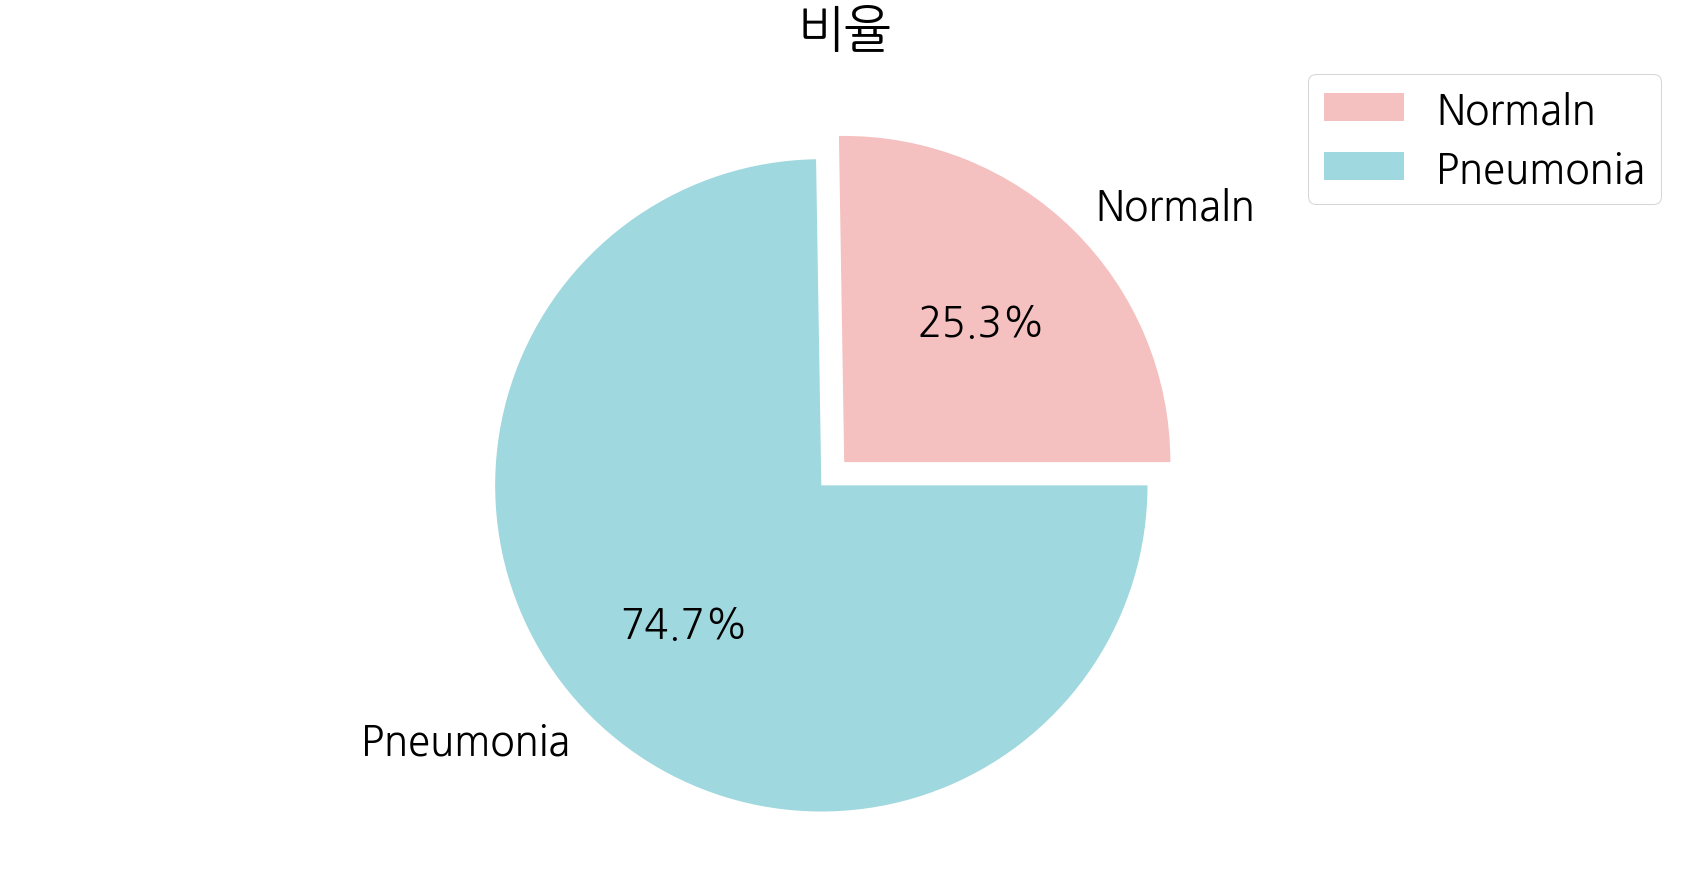

In [35]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print("Normal images count in training set(정상 이미지 수): " + str(COUNT_NORMAL), '개')

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print("Pneumonia images count in training set(폐렴 이미지 수): " + str(COUNT_PNEUMONIA), '개')

size = [COUNT_NORMAL, COUNT_PNEUMONIA]  # 데이터
label = ['Normaln','Pneumonia']  # 레이블
color = ['#f5c0c0','#9fd8df']  # 색깔
plt.figure(figsize=(30, 15))
plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f%%', colors=color, explode=(0,0.1))
plt.legend()
plt.title("비율", fontsize=50)
plt.show()

결과를 보면 정상보다 폐렴 이미지 수가 약 3배 더 많이 있습니다. 우리가 사용할 CNN 모델의 경우 데이터가 클래스별 balance가 좋을 수록 training을 잘 합니다. 데이터가 클래스 불균형(imbalance)한 것은 차후에 조정할 예정입니다. test와 val 데이터셋은 평가하기 위해서 사용되기 때문에 학습과 관련이 없으므로 imbalance한 데이터 셋이어도 문제 없습니다.

In [6]:
# tf.data(인스턴스)는 tensorflow에서 학습시킬 때, 배치처리 작업을 보다 효율적으로 할 수 있도록 해줌!
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [7]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print("Training images count: " + str(TRAIN_IMG_COUNT), '개')  # Train 데이터 셋 갯수 출력

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT), '개')  # validation 데이터 셋 갯수 출력

Training images count: 4185 개
Validating images count: 1047 개


In [8]:
# 라벨 이름들을 확인
CLASS_NAMES = np.array([str(tf.strings.split(item, os.path.sep)[-1].numpy())[2:-1]
                        for item in tf.io.gfile.glob(str(ROOT_PATH + "/chest_xray/train/*"))])
print(CLASS_NAMES)

['NORMAL' 'PNEUMONIA']


두 개의 라벨이 있군요. 정상을 의미하는 'NORMAL', 폐렴을 의미하는 'PNEUMONIA' 가 있습니다.
현재 이미지에는 라벨 데이터가 따로 없습니다. 제목에 'NORMAL', 'PNEUMONIA'라고 되어 있기 때문에 이를 이용해서 라벨 데이터를 만들어 주는 함수를 만들어 보겠습니다.

In [9]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)를 리턴

# GPU 메모리를 더욱 효율적으로 사용하기 위해 이미지의 사이즈를 통일 시키고 이미지 사이즈를 줄여봄
def decode_img(img):
  # 이미지를 uint8 tensor로 바꾼다.
  img = tf.image.decode_jpeg(img, channels=3)
  # img를 범위 [0,1]의 float32 데이터 타입으로 바꿈
  img = tf.image.convert_image_dtype(img, tf.float32)
  # img의 이미지 사이즈를 IMAGE_SIZE에서 지정한 사이즈로 수정
  return tf.image.resize(img, IMAGE_SIZE)

def process_path(file_path):
    label = get_label(file_path)  #  get_label을 이용해서 라벨 값을 가져옴
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [10]:
# num_parallel_calls 파라미터에서 set-up에서 초기화 한 AUTOTUNE을 이용하면 더욱 빠르게 데이터를 처리
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# 이미지가 잘 리사이즈 되었는지, 그리고 라벨이 잘 들어가 있는지 확인
for image, label in train_ds.take(1):  # train_ds.take(1)은 '하나의 데이터만 가져온다'라는 의미
    print("Image shape : ", image.numpy().shape)
    print("Label : ", label.numpy())

Image shape :  (180, 180, 3)
Label :  True


In [11]:
# test 데이터 셋을 만들고 갯수 확인
test_list_ds = tf.data.Dataset.list_files(str(ROOT_PATH + '/chest_xray/test/*/*'))
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print('test Dataset 갯수:', TEST_IMAGE_COUNT,'개')

test Dataset 갯수: 624 개


In [12]:
# prepare_for_training() 함수 : 학습 데이터를 효율적으로 할 수 있도록 데이터를 변환
def prepare_for_training(ds, shuffle_buffer_size=1000):
    # shuffle() : 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    # repeat() : 자동으로 데이터를 맞춰줌
    ds = ds.repeat()
    # batch() : BATCH_SIZE에서 정한 만큼의 배치로 주어짐!
    ds = ds.batch(BATCH_SIZE)
    # prefetch() : 학습데이터를 나눠서 읽어오기 때문에, 리소스의 유휴 상태를 줄일 수 있음!
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

### Step3. 데이터 시각화
---
학습용 데이터를 시각화해서 확인해 봅니다.<br>

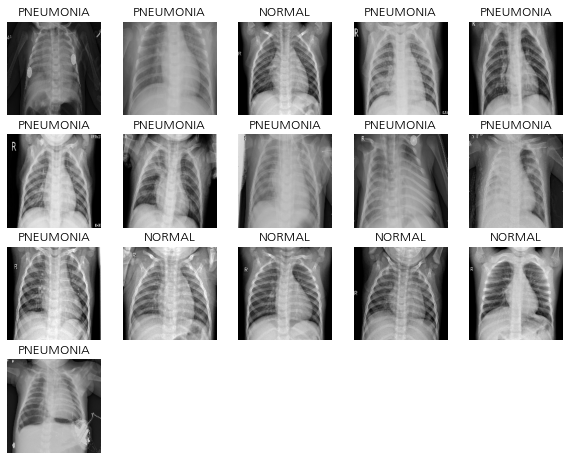

In [41]:
# 먼저, train에 있는 batch 중 첫 번째 배치를 추출
image_batch, label_batch = next(iter(train_ds))

# 추출된 배치를 image와 label 데이터 셋으로 분리
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(16):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.rc('font', size=10)
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch(image_batch.numpy(), label_batch.numpy())

### Step4. CNN 모델링
---
의료영상 판독을 위해 실습에서 구현했던 model에서 다양한 것들을 바꾸어 가며 실험해볼 수 있습니다.<br>Convolution filter, 채널 개수, activation, 모델구조 등을 다양하게 바꾸어볼 수 있습니다.</n>

그리고, 우리는 BatchNormalization과 Dropout을 한 모델 안에서 동시에 사용하는 특이한 구성을 실습했습니다.<br> 이것은 일반적으로 잘 사용되는 형태는 아닙니다.<br>하지만 이미지 사이즈가 크고 데이터가 부족한 의료영상에서는 실용적으로 간혹 좋은 성능을 보이기도 합니다.<br>만약 이 구성을 변경해 보면 어떤 효과가 발생하는지도 실험해 봅시다.<br><br>BatchNormalization을 쓰거나 혹은 쓰지 않거나, Dropout을 쓰거나 혹은 쓰지 않거나 할 수 있습니다.<br>또, Dropout 비율을 변경해볼 수도 있습니다.

In [14]:
# Convolution block 생성
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

In [15]:
# Dense Block
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block     

먼저, Convolution block을 만듭니다. conv_block()의 구성은 Convolution을 두번 진행하고 Batch Normalization을 통해서 Gradient vanishing, Gradient Exploding을 해결합니다. 그리고 Max Pooling을 합니다.

In [16]:
# 두 가지를 함께 사용하는 모델
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### Step5. 데이터 imbalance 처리
---
실습코드에서 데이터의 imbalance 문제에 대처하기 위해 데이터 비율로 나누어진 class_weight를 설정해 주었습니다. 만약 이러한 처리를 생략한다면 어떻게 될까요?<br>또 recall을 강조하기 위해 폐렴데이터를 잘 맞추는 것을 더 강화하는 효과를 만들어낼 수는 없을까요?
> **`Weight balancing`** : training set 의 각 데이터에서 loss 를 계산할 때 특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여하는 방법

In [17]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0  # 'Normal' 이미지에 사용할 weight를 세팅
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0  # 'Pneumonia' 이미지에 사용할 weight를 세팅

class_weight = {0: weight_for_0, 1: weight_for_1}

# 전체 데이터 건수에 반비례하도록 설정됨
print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.95
Weight for class 1: 0.67


### Step6. 모델 훈련
---
이미지 훈련은 GPU를 사용할 것이기 때문에 먼저 GPU를 선택합니다.
loss 함수를 변경하기는 어렵겠지만, optimizer나 learning rate 등의 변화를 고려해볼 수 있을 것입니다.

In [18]:
# 모델 선언
with tf.device('/GPU:0'):  # 먼저 GPU를 선택
    model = build_model()  # build_model() : 위에서 만들었던 모델 함수
    
    # 성과에 대해서 측정하기 위한 metrics 3가지
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',  # 이미지의 라벨이 두 개밖에 없기 때문에 binary사용
        metrics=METRICS
    )

    

**✓ 다중 분류 손실 함수 정리**

**1. categorical_crossentropy**

    - 다중 분류 손실 함수
    - 출력 값이 one-hot encoding된 결과로 나온다. -> label(y)을 one-hot encoding해서 넣어줘야 함
    - 클래스가 상호 배타적일 경우(e.g. 각 샘플이 정확히 하나의 클래스에 속하는 경우) 사용
 

**2. sparse_categorical_crossentropy**

    - 다중 분류 손실 함수
    - integer type 클래스 -> one-hot encoding하지 않고 정수 형태로 label(y)을 넣어줌
    - 한 샘플에 여러 클래스가 있거나 label이 soft 확률일 경우 사용
 

**3. binary_crossentropy**

    - binary 다중 분류 손실 함수
    - label들이 독립적일 때 사용

출처(https://hororolol.tistory.com/375)

In [19]:
# 모델 fit
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

TypeError: fit() got an unexpected keyword argument 'validationc_data'

### Step7. 결과 확인과 시각화
---
테스트데이터로 훈련된 모델을 평가해 봅시다.<br>우선은 accuracy를 고려해야겠지만 의료영상 모델의 특성상 recall도 중요합니다.<br>훈련과정의 history 그래프를 시각화해 보고, 학습 진행양상을 면밀히 분석해 보는 것도 잊지 않도록 합시다.

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
# 테스트 데이터로 모델 평가
loss, acc, prec, rec = model.evaluate(test_ds)

### Step8. 정확도를 올려봅시다.
---
그럼 이제 정확도를 더 올릴 수 없는지 생각해봅시다.

**✓ 의료영상 이미지의 특성상 데이터는 언제나 충분하지 않습니다. 이를 극복할 수 있는 방법을 고민해 봅시다. 예를 들어 좌우반전 정도의 augmentation만 도입한다고 한다면 다음과 같이 진행될 것입니다.**

**TIPS]** 그러나 의료영상인 경우, 일반적인 이미지처리에서 사용하는 augmentation들이 항상 도움이 된다고 말할 수 없습니다. 특히 X-RAY 같은 의료영상의 특성상, 육안으로도 구분하기 어려운 미묘한 차이에 더해진 노이즈 등 부수효과가 오히려 방해를 줄 수도 있기 때문입니다.
그래서 augmentation 도입은 신중해야 합니다.

In [43]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)  # 랜덤하게 좌우를 반전합니다.
    return image,label

# prepare_for_training() 함수 : 학습 데이터를 효율적으로 할 수 있도록 데이터를 변환
def prepare_for_training(ds, shuffle_buffer_size=1000):
# augment 적용 부분이 배치처리 함수에 추가되었습니다.
    ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    # shuffle() : 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    # repeat() : 자동으로 데이터를 맞춰줌
    ds = ds.repeat()
    # batch() : BATCH_SIZE에서 정한 만큼의 배치로 주어짐!
    ds = ds.batch(BATCH_SIZE)
    # prefetch() : 학습데이터를 나눠서 읽어오기 때문에, 리소스의 유휴 상태를 줄일 수 있음!
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

TypeError: Invalid shape (16, 180, 180, 3) for image data

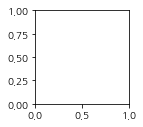

In [44]:
# augmentation을 시도했으니 show_batch() 함수를 통해 실제로 좌우반전 등이 제대로 처리되었는지 확인
# 먼저, train에 있는 batch 중 첫 번째 배치를 추출
image_batch, label_batch = next(iter(train_ds))

# 추출된 배치를 image와 label 데이터 셋으로 분리
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(16):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch(image_batch.numpy(), label_batch.numpy())

In [ ]:
# Convolution block 생성
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

# Dense Block
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

# 두 가지를 함께 사용하는 모델
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0  # 'Normal' 이미지에 사용할 weight를 세팅
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0  # 'Pneumonia' 이미지에 사용할 weight를 세팅

class_weight = {0: weight_for_0, 1: weight_for_1}

# 전체 데이터 건수에 반비례하도록 설정됨
print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

with tf.device('/GPU:0'):  # 먼저 GPU를 선택
    model = build_model()  # build_model() : 위에서 만들었던 모델 함수
    
    # 성과에 대해서 측정하기 위한 metrics 3가지
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',  # 이미지의 라벨이 두 개밖에 없기 때문에 binary사용
        metrics=METRICS
    )

# 모델 fit
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validationc_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )
    
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    
# 테스트 데이터로 모델 평가
loss, acc, prec, rec = model.evaluate(test_ds)

# 루브릭 평가 기준
---
번호|평가문항|상세기준
---|---|---
1 |의료영상을 처리하는 CNN 기반 딥러닝 모델이 잘 구현되었다.|모델 학습이 안정적으로 수렴하는 것을 시각화를 통해 확인하였다.
2 |데이터 준비, 모델구성 등의 과정의 다양한 실험이 체계적으로 수행되었다.|regularization, augmentation 등의 기법의 사용 여부에 따른 모델 성능 측정이 ablation study 형태로 체계적으로 수행되었다.
3 |실습코드를 잘 개선하여 폐렴 검출 정확도가 추가로 향상되었다.|Accuracy 기준 **85%**에 도달하였다.

# 회고
---